In [6]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('..')
from fun_gilles import *
import pandas as pd
import pickle
colors = plt.get_cmap('Set2').colors
title_fs = 16
label_fs = 15
tick_fs = 14
legend_fs = 14

In [7]:
def plot_gillespie(abundances, times, V, SPECIES):
    colors = plt.get_cmap('Set2').colors
    colors = colors

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True) 

    # --- Subplot 1: Concentration ---
    ax1 = axes[0]
    for i in range(len(SPECIES)):
        # Calculate concentration = Abundance / Volume
        ax1.plot(times, abundances[:, i] / V, label=SPECIES[i], color=colors[i], alpha=0.9)
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time", fontsize= label_fs)
    ax1.set_ylabel("Concentration", fontsize= label_fs)
    ax1.set_title("Concentration Evolution", fontsize= title_fs)
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="SPECIES", fontsize= legend_fs)
    ax1.tick_params(axis='both', labelsize=tick_fs)

    # --- Subplot 2: Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time", fontsize= label_fs)
    ax2.set_ylabel("Volume", fontsize= label_fs)
    ax2.set_title("Volume Evolution", fontsize= title_fs)
    ax2.tick_params(axis='both', labelsize=tick_fs)
   
    plt.tight_layout(rect=[0, 0, 1, 1]) 
    plt.show()

In [12]:
def plot_deterministic(concentrations, times, V, SPECIES):
    colors = plt.get_cmap('Set2').colors
    colors = colors
    linestyles = [ "-", "--", "-","--"]

    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True) 

    # --- Subplot 1: Concentration ---
    ax1 = axes[0]
    for i in range(len(SPECIES)):
        # Calculate concentration = Abundance / Volume
        ax1.plot(times, concentrations[i], label=SPECIES[i], color=colors[i], alpha=0.9, linestyle= linestyles[i])
    ax1.grid(True, linestyle='--', alpha=0.3)
    ax1.set_xlabel("Time", fontsize= label_fs)
    ax1.set_ylabel("Concentration", fontsize= label_fs)
    ax1.set_title("Concentration Evolution", fontsize= title_fs)
    ax1.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), title="SPECIES", fontsize= legend_fs)
    ax1.tick_params(axis='both', labelsize=tick_fs)

    # --- Subplot 2: Volume ---
    ax2 = axes[1]
    ax2.plot(times, V, color='gray')
    ax2.grid(True, linestyle='--', alpha=0.3)
    ax2.set_xlabel("Time", fontsize= label_fs)
    ax2.set_ylabel("Volume", fontsize= label_fs)
    ax2.set_title("Volume Evolution", fontsize= title_fs)
    ax2.tick_params(axis='both', labelsize=tick_fs)
   
    plt.tight_layout(rect=[0, 0, 1, 1]) 
    plt.show()

# intermediates

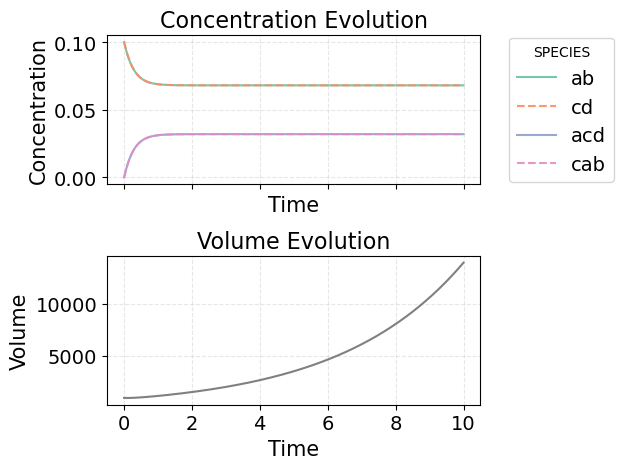

In [13]:
def odes_intermediates(t, X):
    V, ab, cd, acd, cab = X
    a, b, c, d = 1, 1, 1, 1
    k1, k2, k3, k4, k5, k6, k7, k8 = 1,1,1,1,1,1,1,1
    fi = 0.2
    dVdt = (V/fi) * (k3 * b * acd + k7 * d * cab - k4 * ab * cd - k8 * ab * cd)
    dabdt = k3 * b * acd + k6 * cab + k7 * cab * d - k4 * ab * cd - k5 * ab * c - k8 * cd * ab - (ab / V) * dVdt
    dcddt = k3 * b * acd + k7 * cab * d + k2 * acd - k4 * ab * cd - k1 * a * cd - k8 * cd * ab - (cd / V) * dVdt
    dacddt = k4 * ab * cd + k1 * a * cd - k3 * b * acd - k2 * acd - (acd / V) * dVdt
    dcabdt = k5 * ab * c + k8 * cd * ab - k6 * cab - k7 * cab * d - (cab / V) * dVdt
    return [dVdt, dabdt, dcddt, dacddt, dcabdt]
    

t_span = (0, 10)
y0 = [1000, 0.1, 0.1, 0, 0]
sol = solve_ivp(odes_intermediates, t_span, y0, t_eval=np.linspace(0, 10, 5000))

plot_deterministic(sol.y[1:], sol.t, sol.y[0], ['ab', 'cd', 'acd', 'cab'])

In [14]:
abundancias, tiempos, volumenes = chemistry(method= "Protocell",
                                            iterations= 1e4,
                                            file = "../examples/reactions_autocat.txt",
                                            initial_food= [1000] * 4 + [100] * 2 + [0] * 2,
                                            k = [1] * 8,
                                            V = 1000                                            
                                            )



Criterion for stop was # of iterations


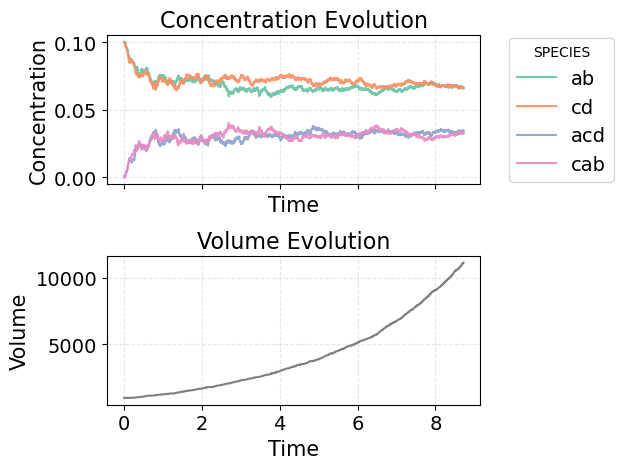

In [15]:
plot_gillespie(abundancias[:, 4:], tiempos, volumenes, ['ab', 'cd', 'acd', 'cab'])

# third order 

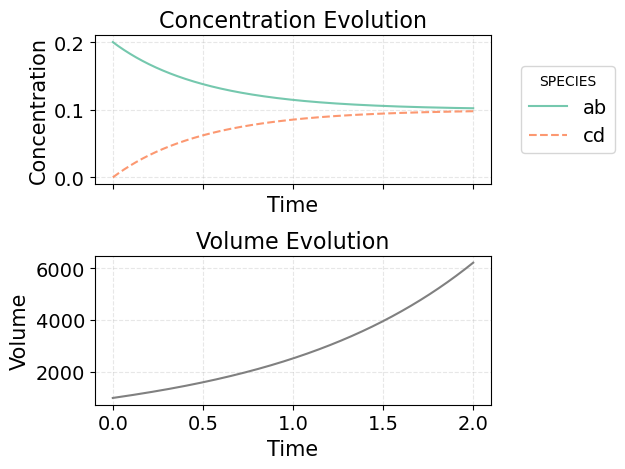

array([1000.        , 1000.40012805, 1000.80035224, ..., 6201.64534776,
       6203.87890878, 6206.11327368])

In [17]:
def odes_thirdorder(t, X):
    V, ab, cd= X
    a, b, c, d = 1, 1, 1, 1
    k1, k2, k3, k4 = 1,1,1,1
    fi = 0.2
    # with concentrations
    dVdt = (V/fi) * (k1 * a * b * cd - k2 * ab * cd + k3 * ab * c * d - k4 * ab * cd)
    dabdt = k1 * a * b * cd - k2 * ab * cd - (ab / V) * dVdt # dilution: as the volume grows, concentration decreases
    dcddt = k3 * ab * c * d - k4 * ab * cd - (cd / V) * dVdt
    return [dVdt, dabdt, dcddt]
    

t_span = (0, 2)
y0 = [1000, 0.2, 0]
sol = solve_ivp(odes_thirdorder, t_span, y0, t_eval=np.linspace(0, 2, 5000))

plot_deterministic(sol.y[1:], sol.t, sol.y[0], ['ab', 'cd'])
sol.y[0]

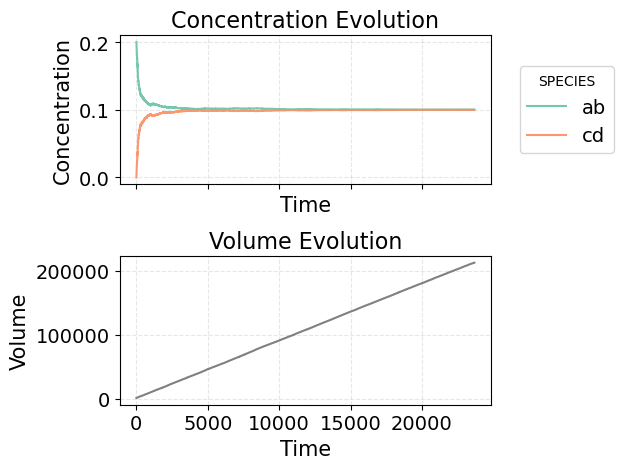

In [19]:
abundancias, tiempos, volumenes = chemistry(method= "Protocell",
                                            iterations= 1e5,
                                            file = "../examples/third_order.txt",
                                            initial_food= [1000] * 4 + [200] + [0],
                                            k = [1] * 4,
                                            V = 1000                                       
                                            )


plot_gillespie(abundancias[:, 4:], tiempos, volumenes, ['ab', 'cd'])

## con abundancias

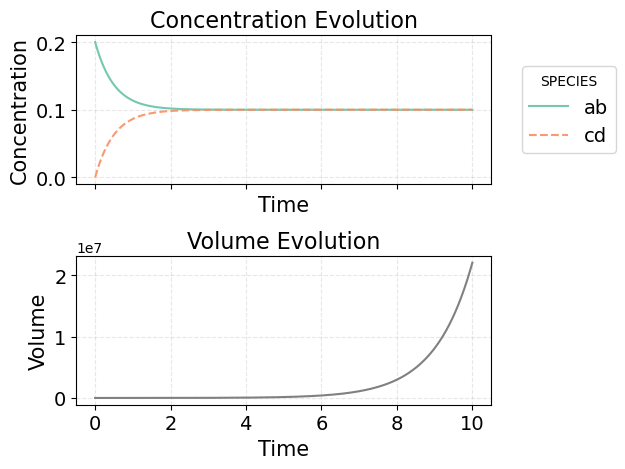

array([1.00000000e+03, 1.00200240e+03, 1.00400881e+03, ...,
       2.19284828e+07, 2.19723924e+07, 2.20163900e+07])

In [ ]:
def odes_thirdorder(t, X):
    V, AB, CD= X
    a, b, c, d = 1,1,1,1 # concentrations: they remain constant
    k1, k2, k3, k4 = 1,0,1,0
    Ci = 0.2
    # with abundances (mayus for abundances)
    dVdt = (1/Ci) * (k1 * a * b * CD - k2 * (AB * CD)/V + k3 * AB * c * d - k4 * (AB * CD)/V)
    dABdt = k1 * a * b * CD - k2 * (AB * CD)/V
    dCDdt = k3 * AB * c * d - k4 * (AB * CD)/V 
    return [dVdt, dABdt, dCDdt]
    
 
t_span = (0, 10)
y0 = [1000, 200, 0]
sol = solve_ivp(odes_thirdorder, t_span, y0, t_eval=np.linspace(0, 10, 5000))

plot_deterministic(sol.y[1:]/sol.y[0], sol.t, sol.y[0], ['ab', 'cd'])
sol.y[0]